###### Assignment -02
##### Name: Vakeesan.K
##### Index NO: 190643G

C:\Users\USER\AppData\Local\Temp\ipykernel_11212\952546335.py:47: RuntimeWarning: invalid value encountered in double_scalars
  px = (a*(b+c-a)*x1 + b*(c+a-b)*x2 + c*(a+b-c)*x3) / s #x_coordinate of the center of the circle
C:\Users\USER\AppData\Local\Temp\ipykernel_11212\952546335.py:48: RuntimeWarning: invalid value encountered in double_scalars
  py = (a*(b+c-a)*y1 + b*(c+a-b)*y2 + c*(a+b-c)*y3) / s #y_coordinate of the center of ther circle
C:\Users\USER\AppData\Local\Temp\ipykernel_11212\952546335.py:50: RuntimeWarning: invalid value encountered in double_scalars
  r = ar*br*cr / ((ar+br+cr)*(-ar+br+cr)*(ar-br+cr)*(ar+br-cr))**0.5 #radius of the circle


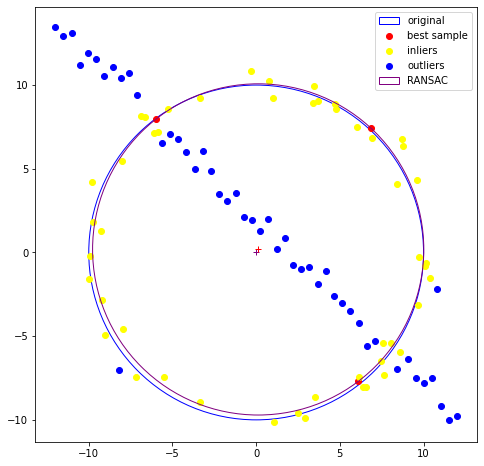

In [6]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import math
import random

# np.random.seed ( 0 )
N,r = 100,10 
half_n = N// 2
s = r /16
t = np.random.uniform(0 , 2*np.pi , half_n )
n = s*np.random.randn ( half_n )
x , y = ( r + n)*np.cos ( t ) , ( r + n)*np.sin ( t ) #
X_circ = np.hstack ( ( x.reshape ( half_n , 1 ) , y.reshape ( half_n , 1 ) ) )
m, b = -1, 2
x = np.linspace (-12, 12 , half_n )
y = m*x + b + s*np.random.randn ( half_n ) #line equation with random noise
X_line = np.hstack ( ( x.reshape ( half_n , 1 ) , y.reshape ( half_n , 1 ) ) )
X = np.vstack ( ( X_circ , X_line ) ) 
plt.figure(figsize=(8,8))
plt.plot(0,0,color='purple', marker='+') 
original_circle = plt.Circle((0, 0), radius=r, color='blue', fc='y', fill=False,label='original')
plt.gca().add_patch(original_circle) #draw the circle without the noisy points


def my_ransac_1(X,t): #t - threshold, X- data points
    num_iterations=math.inf 
    iterations_done =0 
    best_model = None 
    best_sample= None
    #min_abs_error=math.inf #defining the absolute mean error when there is same number of inliers for more models
    prob_outlier = 0.5 #assume the outlier probability
    desired_prob = 0.95  
    inlier_max_count=0 
    p=0.99 #ideal value

    while(num_iterations > iterations_done):
        #estimate x,y,r from three radom points
        cor_1,cor_2,cor_3= random.choices(X,k=3)
        #fina a circle through the three points
        x1,y1,x2,y2,x3,y3=cor_1[0],cor_1[1],cor_2[0],cor_2[1],cor_3[0],cor_3[1]
        c = (x1-x2)**2 + (y1-y2)**2 
        a = (x2-x3)**2 + (y2-y3)**2
        b = (x3-x1)**2 + (y3-y1)**2
        s = 2*(a*b + b*c + c*a) - (a*a + b*b + c*c) 
        px = (a*(b+c-a)*x1 + b*(c+a-b)*x2 + c*(a+b-c)*x3) / s #x_coordinate of the center of the circle
        py = (a*(b+c-a)*y1 + b*(c+a-b)*y2 + c*(a+b-c)*y3) / s #y_coordinate of the center of ther circle
        ar,br,cr= a**0.5,b**0.5,c**0.5 
        r = ar*br*cr / ((ar+br+cr)*(-ar+br+cr)*(ar-br+cr)*(ar+br-cr))**0.5 #radius of the circle
        
        #select the points within the donut region
        inliers=[] #inlier set
        #abs_error=0 #set the initial value to zero
        for i in X: #take all the points from the all data and find the inliers
            x_=i[0] #x_coordinate 
            y_=i[1] #y_coordinate 
            if(abs(np.sqrt(pow(x_-px,2)+pow(y_-py,2))-r)<t): #check the componets inside the donut region
                inliers.append([x_,y_]) 
                #abs_error+=np.abs(np.sqrt(pow(x_-px,2)+pow(y_-py,2))-r)
                
        #check whether those points set has maximum number of inliers
        if ((inlier_max_count<=len(inliers)) ): #and (abs_error >= min_abs_error)
            inlier_max_count=len(inliers)
            #min_abs_error=abs_error
            best_model=[px,py,r,cor_1,cor_2,cor_3]
            best_sample=[[x1,y1],[x2,y2],[x3,y3]]
            best_inliers=inliers
            
        #loop condition
        prob_outlier = 1 - len(inliers)/N
        try:
            num_iterations = math.log(1 - desired_prob)/math.log(1 - (1 - prob_outlier)**3)
        except ZeroDivisionError :
            pass
        iterations_done = iterations_done + 1
        
    return best_model,best_sample,best_inliers
            

best_model,best_sample,inliers=my_ransac_1(X,1)

a,b,r_ransac=best_model[0],best_model[1],best_model[2] 

x_=[x[0] for x in best_sample]
y_=[y[1] for y in best_sample]
plt.scatter(x_, y_, c='red', marker='o', label='best sample') #plot the best 3 points

x_i = [x[0] for x in inliers if x not in best_sample]
y_i = [x[1] for x in inliers if x not in best_sample]
plt.scatter(x_i, y_i, c='yellow', marker='o', label='inliers') #plot the inliers

x_d=[]
y_d=[]
for j in X:
    if ((inliers-j).all()):
        x_d.append(j[0])
        y_d.append(j[1])
plt.scatter(x_d, y_d, c='blue', marker='o', label='outliers') #plot the outliers  
circle = plt.Circle((a, b), radius=r_ransac, color='purple', fc='y', fill=False,label='RANSAC') #plot the estimated circle
plt.gca().add_patch(circle)
plt.plot(a,b,'r+')
# circle1 = plt.Circle((a, b), radius=(r+threshold), color='g',linestyle='dashed', fc='y', fill=False) #show the donut region
# circle2 = plt.Circle((a, b), radius=(r-threshold), color='g',linestyle='dashed', fc='y', fill=False) #show the donut region
# plt.gca().add_patch(circle1)
# plt.gca().add_patch(circle2)

plt.axis('scaled')
plt.legend()
# plt.tight_layout()
plt.show()   

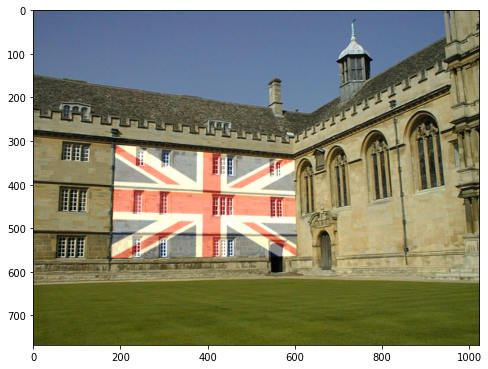

In [4]:
import cv2 as cv
import numpy as np
import argparse

def click_event(event, x, y, flags, params): #selecting the four points
    if event == cv2.EVENT_LBUTTONDOWN:
        cv.circle(base_image_copy, (x,y), 4, (0,0,255), -1)
        points.append([x, y])
        if len(points) <= 4:
            cv.imshow('image', base_image_copy)

points = []

base_image = cv.imread(r"D:\01.Vakeesan_vk\01.academics\04. 4 th semester\8 - EN2550 - Fundamentals of image processing\img_process\assignment_02\003.jpg")
base_image_copy = base_image.copy()
subject_image = cv.imread(r"D:\01.Vakeesan_vk\01.academics\04. 4 th semester\8 - EN2550 - Fundamentals of image processing\img_process\assignment_02\Flag_of_the_United_Kingdom.svg.png")

cv2.imshow('image', base_image_copy)
cv2.setMouseCallback('image', click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Let's sort the points in the following order
# Top-Left, Top-Right, Bottom-Right, Bottom-Left
# select the region being the contour 
sorted_pts = np.zeros((4, 2), dtype="float32")
s = np.sum(points, axis=1) #find the sum of the points
sorted_pts[0] = points[np.argmin(s)]
sorted_pts[2] = points[np.argmax(s)]

diff = np.diff(points, axis=1) #fin the difference of the points
sorted_pts[1] = points[np.argmin(diff)]
sorted_pts[3] = points[np.argmax(diff)]

h_base, w_base, c_base = base_image.shape
h_subject, w_subject = subject_image.shape[:2]

pts1 = np.float32([[0, 0], [w_subject, 0], [w_subject, h_subject], [0, h_subject]])
pts2 = np.float32(sorted_pts) #soted_pts

# Get the transformation matrix and use it to get the warped image of the subject
transformation_matrix = cv.getPerspectiveTransform(pts1, pts2)
warped_img = cv.warpPerspective(subject_image, transformation_matrix, (w_base, h_base))

# Create a mask
mask = np.zeros(base_image.shape, dtype=np.uint8)
roi_corners = np.int32(sorted_pts)

# Fill in the region selected with white color
filled_mask = mask.copy()
cv.fillConvexPoly(filled_mask, roi_corners, (255, 255, 255))

# Invert the mask color
inverted_mask = cv.bitwise_not(filled_mask)

# Bitwise AND the mask with the base image
masked_image = cv.bitwise_and(base_image, inverted_mask)

output = cv.addWeighted(warped_img, 0.5, base_image, 1, 0.0) #set the alpha=0.5 , beta=1
plt.figure(figsize=(8,8))
plt.imshow(cv.cvtColor(output,cv.COLOR_BGR2RGB))
plt.show()

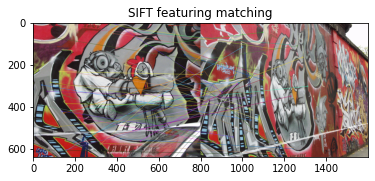

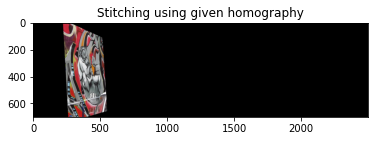

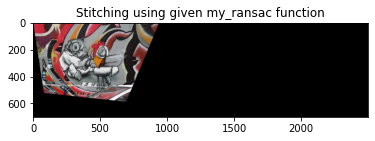

(<matplotlib.image.AxesImage at 0x259b77fe3d0>,
 Text(0.5, 1.0, 'Stitching using given my_ransac function'),
 None)

In [32]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

def homography_finder(pairs):
    A = []
    for x1, y1, x2, y2 in pairs:
        A.append([x1, y1, 1, 0, 0, 0, -x2 * x1, -x2 * y1, -x1])
        A.append([0, 0, 0, x1, y1, 1, -y2 * x1, -y2 * y1, -y1])
    A = np.asarray(A)

    # Singular Value Decomposition (SVD)
    U, S, V = np.linalg.svd(A)

    # V has shape (9, 9) for any number of input pairs. V[-1] is the eigenvector
    # of (A^T)A with the smalles eigenvalue. Reshape into 3x3 matrix.
    H = np.reshape(V[-1], (3, 3))

    # Normalization
    #H = (1 / H.item(8)) * H
    H /= H[2][2]
    return H
    
def my_ransac_2(point_map,t):
    num_iterations=math.inf
    iterations_done =0
    N=1000
    #min_abs_error=math.inf
    
    prob_outlier = 0.5
    desired_prob = 0.95
    inlier_max_count=0 
    p=0.99 #ideal value
    
    while(num_iterations > iterations_done):
        # randomly choose 4 points from the matrix to compute the homography
        pairs = [point_map[i] for i in np.random.choice(len(point_map), 4)]
        H=homography_finder(pairs)
        inliers=0
        #abs_error=0
        for pair in point_map:
             # points in homogeneous coordinates
            p1 = np.array([pair[0], pair[1], 1])
            p2 = np.array([pair[2], pair[3], 1])

            p2_estimate = np.dot(H, np.transpose(p1))
            p2_estimate = (1 / p2_estimate[2]) * p2_estimate
            if (np.linalg.norm(np.transpose(p2) - p2_estimate)<500):
                inliers+=1
                
        #check the maximum inliers's model detected
        if (inlier_max_count <=inliers): #and (abs_error >= min_abs_error)
            inlier_max_count = inliers
            homography = H
            #if (bestInliers > (point_map * threshold)): break
        #loop condition
        prob_outlier = 1 - inliers/N
        try:
            num_iterations = math.log(1 - desired_prob)/math.log(1 - (1 - prob_outlier)**3)
        except ZeroDivisionError :
            pass
        iterations_done = iterations_done + 1

    return homography

# read images
img1 = cv2.imread(r"D:\01.Vakeesan_vk\01.academics\04. 4 th semester\8 - EN2550 - Fundamentals of image processing\img_process\assignment_02\img1.ppm")  
img2 = cv2.imread(r"D:\01.Vakeesan_vk\01.academics\04. 4 th semester\8 - EN2550 - Fundamentals of image processing\img_process\assignment_02\img5.ppm") 

#sift
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)


point_map = np.array([[keypoints_1[match.queryIdx].pt[0],
                        keypoints_1[match.queryIdx].pt[1],
                        keypoints_2[match.trainIdx].pt[0],
                        keypoints_2[match.trainIdx].pt[1]] for match in matches])
homography = my_ransac_2(point_map,0.6)
original_homography=np.array([[6.2544644e-01 ,  5.7759174e-02  , 2.2201217e+02],
                             [ 2.2240536e-01 ,  1.1652147e+00 , -2.5605611e+01],
                             [4.9212545e-04  ,-3.6542424e-05 ,  1.0000000e+00]])
#print(matches[:50])
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img1, flags=2) #matches[:50], img2, flags=2
ori_stitch = cv2.warpPerspective(img1,original_homography,(2500,700))
my_stitch = cv2.warpPerspective(img1, homography, (2500,700))
plt.imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)),plt.title("SIFT featuring matching"),plt.show()
plt.imshow(cv2.cvtColor(ori_stitch,cv2.COLOR_BGR2RGB)),plt.title("Stitching using given homography"),plt.show()
plt.imshow(cv2.cvtColor(my_stitch,cv2.COLOR_BGR2RGB)),plt.title("Stitching using given my_ransac function"),plt.show()

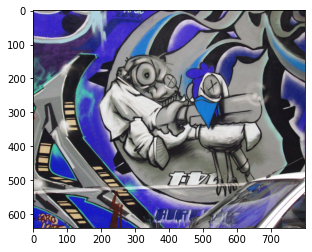

In [35]:
inputIm=img1
refIm=img2
H=homography
H_inv = np.linalg.inv(H)
inputH, inputW, c = inputIm.shape
outputH, outputW, c = refIm.shape
min_x = float("inf")
min_y = float("inf")
max_x = float("-inf")
max_y = float("-inf")
cornersi =  [(0,0), (inputH, inputW), (0, inputW), (inputH, 0)]
cornerso =  [(0,0), (inputH, inputW), (0, inputW), (inputH, 0)]
for i,j in cornersi:
        x, y, w = np.matmul(H, [j , i, 1])
        x = x/w
        y = y/w
        if x > max_x:
            max_x = int(x)
        if x < min_x:
            min_x = int(x)
        if y > max_y:
            max_y = int(y)
        if y < min_y:
            min_y = int(y)
warpIm = np.zeros((max_y - min_y,max_x - min_x, 3))
for i in range(0, max_x - min_x):
    for j in range (0, max_y - min_y):
        x, y, w = np.matmul(H_inv, [i + min_x, j + min_y, 1])
        x = int(x/w)
        y = int(y/w)
        a = 0
        b = 0
        c = 0
        if not (y < 0 or y >= inputH or x < 0 or x >= inputW):
            a, b, c = inputIm[y, x, :]
        warpIm[j, i, :] = [a/255, b/255, c/255]
oldx = min_x
oldy = min_y
oldmx = max_x
oldmy = max_y
for i,j in cornerso:
    if j > max_x:
        max_x = int(j)
    if j < min_x:
        min_x = int(j)
    if i > max_y:
        max_y = int(i)
    if i < min_y:
        min_y = int(i)
mergeIm = np.zeros(((max_y - min_y),(max_x - min_x), 3))
for i in range(min_x, max_x):
    for j in range (min_y, max_y):
        a = 0
        b = 0
        c = 0
        if not (j < oldy or j >= oldmy or i < oldx or i >= oldmx):
            a, b, c = warpIm[j - oldy, i - oldx, :]
            if a == 0.0 or b == 0.0 or c == 0.0:
                if not (j < 0 or j >= outputH or i < 0 or i >= outputW):
                    a, b, c = refIm[j, i, :]/255
        else:
            if not (j < 0 or j >= outputH or i < 0 or i >= outputW):
                a, b, c = refIm[j, i, :]/255
        mergeIm[j - min_y, i- min_x, :] = [a, b, c]
        
plt.imshow(mergeIm)